In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from firesong.Legend import legend_simulation

mpl.style.use('./firesong_style.mplstyle')

# LEGEND
For some sources, their distribution depends on both redshift and the source luminosity. Legend is designed for generating this type of sources.
I will use the Luminosity-Dependent-Density-Evolution (LDDE) model of Blazars ([arXiv:1012.1247](https://arxiv.org/pdf/1012.1247.pdf), [arXiv:1206.4734](https://arxiv.org/pdf/1206.4734.pdf)), which will be referred to as the HA2012 model, as an example. This model has been implemented in Firesong.

HA2012 models the distribution of blazars with their X-ray luminosities, which will be used as an input parameters `lmin` and `lmax` for the simulation.
The output will be the gamma ray flux (converted from the bolometric luminosity, and without attenuation), redshifts, decs, and and r.a.s of the blazars.

In [27]:
result = legend_simulation('./', 
                        filename=None,
                        L_Evolution="HA2012BL",     # name of the model
                        bins = 1000,   # number of bins to construct the 2D PDF, 1000 here for speed
                        index = 2.19,  # spectral index for the flux
                        emin = 1e0,    # minimum energy of the gamma ray, in GeV
                        emax = 1e3,    # maximum energy of the gamma ray
                        lmin=38, # log10 of minimum X-ray luminosity, unit erg/s
                        lmax=45, # log10 of maximum X-ray luminosity, unit erg/s
                        )

##############################################################################
##### LEGEND initializing        #####
Luminosity Evolution model = HA2012BL
Source Luminosity Limit = 38 - 45 erg/s 
Total number of sources in the universe: 10625 
##### LEGEND initialization done #####
Actual diffuse flux simulated :
E^2 dNdE = 1.1253413091691437e-06 (E/100 TeV)^(-0.18999999999999995) [GeV/cm^2.s.sr]


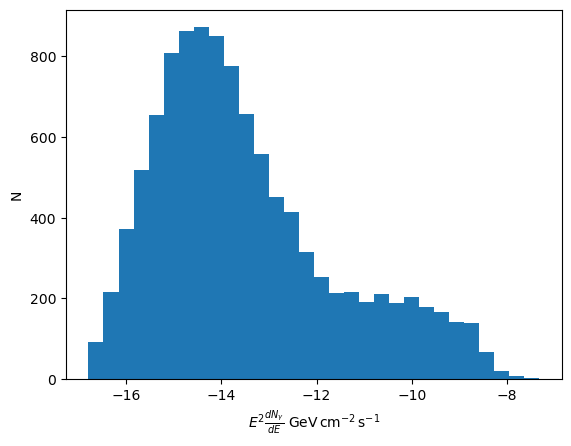

In [28]:
# Distribution of the gamma-ray flux
plt.hist(np.log10(result['flux']), bins=30)
plt.xlabel(r'$E^2\frac{dN_\gamma}{dE}$ $\mathrm{GeV\,cm^{-2}\,s^{-1}}$')
plt.ylabel('N')
plt.show()

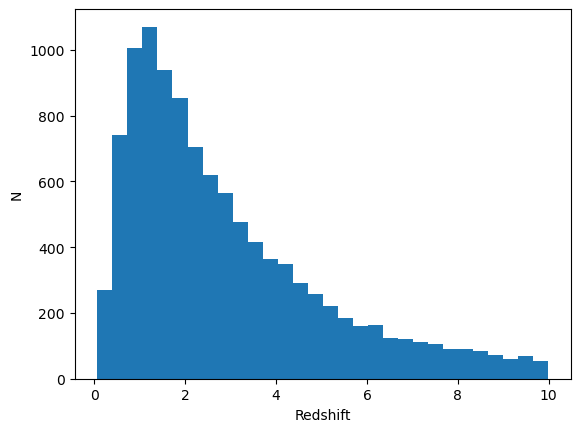

In [30]:
# Distribution of the redshift
plt.hist(result['z'], bins=30)
plt.xlabel('Redshift')
plt.ylabel('N')
plt.show()

## Effect of the luminosity range
The distribution depends on the luminosity, as can be seen from simulation below

In [42]:
result_1 = legend_simulation('./', 
                        filename=None,
                        bins = 1000,   # number of bins to construct the 2D PDF, 1000 here for speed
                        index = 2.19,  # spectral index for the flux
                        emin = 1e0,    # minimum energy of the gamma ray, in GeV
                        emax = 1e3,    # maximum energy of the gamma ray
                        lmin=38, # log10 of minimum X-ray luminosity, unit erg/s
                        lmax=40, # log10 of maximum X-ray luminosity, unit erg/s
                        )
result_2 = legend_simulation('./', 
                        filename=None,
                        bins = 1000,   # number of bins to construct the 2D PDF, 1000 here for speed
                        index = 2.19,  # spectral index for the flux
                        emin = 1e0,    # minimum energy of the gamma ray, in GeV
                        emax = 1e3,    # maximum energy of the gamma ray
                        lmin=43, # log10 of minimum X-ray luminosity, unit erg/s
                        lmax=44, # log10 of maximum X-ray luminosity, unit erg/s
                        )

##############################################################################
##### LEGEND initializing        #####
Luminosity Evolution model = HA2012BL
Source Luminosity Limit = 38 - 40 erg/s 
Total number of sources in the universe: 7421 
##### LEGEND initialization done #####
Actual diffuse flux simulated :
E^2 dNdE = 6.42978372395181e-10 (E/100 TeV)^(-0.18999999999999995) [GeV/cm^2.s.sr]


/Users/Chris/anaconda3/lib/python3.8/site-packages/firesong/Evolution.py:802: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return scipy.integrate.quad(lambda z: self.RedshiftDistribution(z), 0, zmax)[0]


##############################################################################
##### LEGEND initializing        #####
Luminosity Evolution model = HA2012BL
Source Luminosity Limit = 43 - 44 erg/s 
Total number of sources in the universe: 746 
##### LEGEND initialization done #####
Actual diffuse flux simulated :
E^2 dNdE = 5.82498647795577e-07 (E/100 TeV)^(-0.18999999999999995) [GeV/cm^2.s.sr]


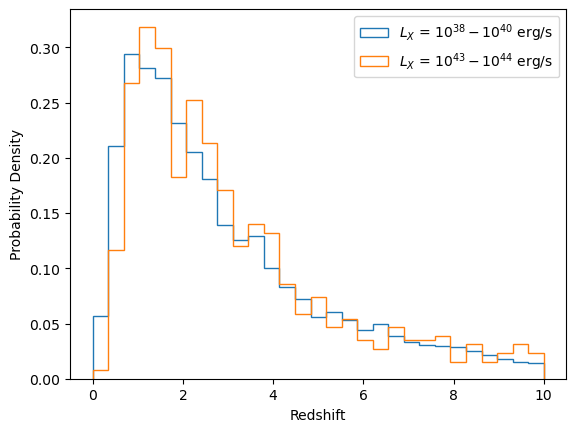

In [44]:
# Distribution of the redshift
plt.hist(result_1['z'], bins=np.linspace(0,10,30), density=True, histtype='step', 
         label=r'$L_X$ = $10^{38} - 10^{40}$ erg/s ')
plt.hist(result_2['z'], bins=np.linspace(0,10,30), density=True, histtype='step', 
         label=r'$L_X$ = $10^{43} - 10^{44}$ erg/s ')
plt.xlabel('Redshift')
plt.ylabel('Probability Density')
plt.legend()
plt.show()